In [1]:
import os
import tensorflow as tf
import math
import numpy as np
import itertools

tf.enable_eager_execution()

from waymo_open_dataset.utils import range_image_utils
from waymo_open_dataset.utils import transform_utils
from waymo_open_dataset.utils import  frame_utils
from waymo_open_dataset import dataset_pb2 as open_dataset

# load sample tf record

In [2]:
sample_file = '/home/zg2309/sample.tfrecord'
dataset = tf.data.TFRecordDataset(sample_file, compression_type='')

# Load frames from dataset
frames = []
for data in dataset:
    frame = open_dataset.Frame()
    frame.ParseFromString(bytearray(data.numpy()))
    frames.append(frame)

In [4]:
#first frame
fr = frames[0]
dir(fr)

['ByteSize',
 'Clear',
 'ClearExtension',
 'ClearField',
 'CopyFrom',
 'DESCRIPTOR',
 'DiscardUnknownFields',
 'Extensions',
 'FindInitializationErrors',
 'FromString',
 'HasExtension',
 'HasField',
 'IsInitialized',
 'ListFields',
 'MergeFrom',
 'MergeFromString',
 'ParseFromString',
 'RegisterExtension',
 'SerializePartialToString',
 'SerializeToString',
 'SetInParent',
 'UnknownFields',
 'WhichOneof',
 '_CheckCalledFromGeneratedFile',
 '_SetListener',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_extensions_by_name',
 '_extensions_by_number',
 'camera_labels',
 'context',
 'images',
 'laser_labels',
 'lasers',


In [34]:
dir(fr.context)

['ByteSize',
 'Clear',
 'ClearExtension',
 'ClearField',
 'CopyFrom',
 'DESCRIPTOR',
 'DiscardUnknownFields',
 'Extensions',
 'FindInitializationErrors',
 'FromString',
 'HasExtension',
 'HasField',
 'IsInitialized',
 'ListFields',
 'MergeFrom',
 'MergeFromString',
 'ParseFromString',
 'RegisterExtension',
 'SerializePartialToString',
 'SerializeToString',
 'SetInParent',
 'Stats',
 'UnknownFields',
 'WhichOneof',
 '_CheckCalledFromGeneratedFile',
 '_SetListener',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_extensions_by_name',
 '_extensions_by_number',
 'camera_calibrations',
 'laser_calibrations',
 'name',
 's

# image of this frame

In [8]:
images = fr.images
#front image attribute
front_image = images[0]
dir(front_image)

['ByteSize',
 'Clear',
 'ClearExtension',
 'ClearField',
 'CopyFrom',
 'DESCRIPTOR',
 'DiscardUnknownFields',
 'Extensions',
 'FindInitializationErrors',
 'FromString',
 'HasExtension',
 'HasField',
 'IsInitialized',
 'ListFields',
 'MergeFrom',
 'MergeFromString',
 'ParseFromString',
 'RegisterExtension',
 'SerializePartialToString',
 'SerializeToString',
 'SetInParent',
 'UnknownFields',
 'WhichOneof',
 '_CheckCalledFromGeneratedFile',
 '_SetListener',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_extensions_by_name',
 '_extensions_by_number',
 'camera_readout_done_time',
 'camera_trigger_time',
 'image',
 'name

In [9]:
front_image.name

1

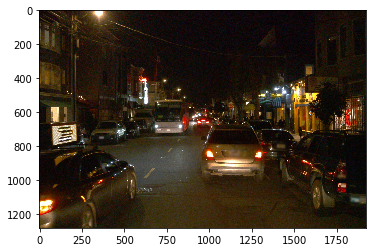

In [14]:
import matplotlib.pyplot as plt
plt.imshow(tf.image.decode_jpeg(front_image.image))

# front label

In [22]:
# no neccessarily exist
camera_labels = fr.camera_labels
print(camera_labels)

[]


In [23]:
laser_labels = fr.laser_labels
print(laser_labels)

[box {
  center_x: 30.893473170239304
  center_y: -6.758305659864618
  center_z: 1.2216667538613422
  width: 0.9179306563533444
  length: 0.9252904219580389
  height: 1.7900000000000205
  heading: 3.0856826115599567
}
metadata {
  speed_x: -1.3562866158094755
  speed_y: -0.029672544426978982
  accel_x: -3.9582104674805294e-14
  accel_y: 5.5092949521754164e-15
}
type: TYPE_PEDESTRIAN
id: "04eA6A5SAjQtiOJcmqAkTg"
, box {
  center_x: -51.58444889221164
  center_y: -4.588145397380458
  center_z: 1.0634337658324
  width: 0.8074789884590656
  length: 0.7623591877539092
  height: 1.740000000000009
  heading: 2.3217332634841945
}
metadata {
  speed_x: -0.596794895687961
  speed_y: 1.4098766640283364
  accel_x: 0.6028025517561058
  accel_y: -0.5739995023433687
}
type: TYPE_PEDESTRIAN
id: "1KpizVP528T6bz1fog6Asg"
, box {
  center_x: -57.341358346850484
  center_y: 7.003663416105837
  center_z: 0.33137802335537003
  width: 1.9148806867737935
  length: 4.493589698361689
  height: 1.689999999999997

In [24]:
projected_lidar_labels = fr.projected_lidar_labels
print(projected_lidar_labels)

[name: FRONT
labels {
  box {
    center_x: 1430.3375364492824
    center_y: 679.4243294677975
    width: 128.9915168291459
    length: 78.34585525785178
  }
  metadata {
    speed_x: -1.3562866158094755
    speed_y: -0.029672544426978982
    accel_x: -3.9582104674805294e-14
    accel_y: 5.5092949521754164e-15
  }
  type: TYPE_PEDESTRIAN
  id: "04eA6A5SAjQtiOJcmqAkTg_FRONT"
}
labels {
  box {
    center_x: 1646.7295274442392
    center_y: 972.4020115180492
    width: 615.1959769639017
    length: 546.5409451115215
  }
  metadata {
    speed_x: -4.7504395389143285e-29
    speed_y: 1.7418278315018395e-28
    accel_x: 5.278266993307198e-29
    accel_y: -1.9353645648421791e-28
  }
  type: TYPE_VEHICLE
  id: "4ptCtyOfsSoPCjRLoxvyoA_FRONT"
}
labels {
  box {
    center_x: 974.5946117721189
    center_y: 639.1929257680949
    width: 40.16237037840722
    length: 128.10375136219807
  }
  metadata {
    speed_x: 0.3482936153969239
    speed_y: -3.827349912298595
    accel_x: 0.16983283441294583